# Modulo 5 Tarea 3-Credit One Final
## Ana Vanessa López Monge

# Libraries Import

In [32]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from matplotlib import pylab
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Define estimators

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import RFE

# Set Model Metrics and Cross Validation 

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Upload Dataset

In [118]:
credit = pd.read_csv('CreditCard.csv', header =1)

In [119]:
creditOriginal=pd.read_csv('CreditCard.csv', header =1)

# General Visualizations

In [120]:
credit.head() #Para visualiaza el numero de atributos

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [121]:
credit.describe() #Para visualizar estadistica descriptiva de la data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [122]:
credit.info() #Tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [123]:
credit.isna() #Para validar la calidad de la data y ver si hay celdas vacias

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
credit.isna().sum() #Resumen de los NA por columna

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Data Preparation

In [125]:
#Renombrando variable dependiente
credit.rename(columns={'default payment next month':'DefaultPaymentNextMonth'}, inplace = True)
#Renombrando variables independientes
credit.rename(columns={'PAY_0':'PaySet05'}, inplace = True)
credit.rename(columns={'PAY_2':'PayAgo05'}, inplace = True)
credit.rename(columns={'PAY_3':'PayJul05'}, inplace = True)
credit.rename(columns={'PAY_4':'PayJun05'}, inplace = True)
credit.rename(columns={'PAY_5':'PayMay05'}, inplace = True)
credit.rename(columns={'PAY_6':'PayApr05'}, inplace = True)


In [126]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PaySet05',
       'PayAgo05', 'PayJul05', 'PayJun05', 'PayMay05', 'PayApr05', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DefaultPaymentNextMonth'],
      dtype='object')

In [127]:
#Cambiando los niveles de las variables independientes estudios, genero y status
credit['STUDY'] = credit.EDUCATION.map({0:'Others', 1:'School', 2:'University', 3:'High Sch.', 4:'Others', 
                                        5:'Others', 6:'Others'})
credit['GENDER'] = credit.SEX.map({1:'Male', 2:'Female'})
credit['MARITAL_ST'] = credit.MARRIAGE.map({0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})

In [128]:
#Realizando intervalos para la variables edad y limite de credito
#Edad
binsAge = [20,30,40,50,60,70,80]
groupNamesAge = ['20-29','30-39','40-49','50-59','60-69','>70']
credit['AGE_RANGE'] = pd.cut(credit['AGE'], binsAge, labels = groupNamesAge)

In [129]:
#limite de  credito
binsCredit=[10000, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 1000000]
groupNamesCredit = ['10K-50K', '51K-100K', '101K-150K', '151K-200K', '201K-250K', 
                '251K-300K', '301K-400K', '401K-500K', '>501K']
credit['LOAN_RANGE'] = pd.cut(credit['LIMIT_BAL'], binsCredit, labels = groupNamesCredit)

In [130]:
#Cambiando el tipo de atributo
credit['DefaultPaymentNextMonth'] = pd.Categorical(credit.DefaultPaymentNextMonth)
credit['GENDER'] = pd.Categorical(credit.GENDER)
credit['STUDY'] = pd.Categorical(credit.STUDY)
credit['MARITAL_ST'] = pd.Categorical(credit.MARITAL_ST)
credit['PaySet05'] = pd.Categorical(credit.PaySet05)
credit['PayAgo05'] = pd.Categorical(credit.PayAgo05)
credit['PayJul05'] = pd.Categorical(credit.PayJul05)
credit['PayJun05'] = pd.Categorical(credit.PayJun05)
credit['PayMay05'] = pd.Categorical(credit.PayMay05)
credit['PayApr05'] = pd.Categorical(credit.PayApr05)

In [131]:
credit['DefaulPaymentNextMonth'] = credit.DefaultPaymentNextMonth.map({0:'No', 1:'Yes'})

In [132]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
ID                         30000 non-null int64
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null int64
EDUCATION                  30000 non-null int64
MARRIAGE                   30000 non-null int64
AGE                        30000 non-null int64
PaySet05                   30000 non-null category
PayAgo05                   30000 non-null category
PayJul05                   30000 non-null category
PayJun05                   30000 non-null category
PayMay05                   30000 non-null category
PayApr05                   30000 non-null category
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1 

In [133]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Initial Analysis and Graph Visualizations

In [134]:
# Realizar un analisis de correlacion
correlationCredit=creditOriginal.corr()
print(correlationCredit)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [135]:
#Realizar un análisis de covarianza
covarianceCredit = creditOriginal.cov()
print(covarianceCredit)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

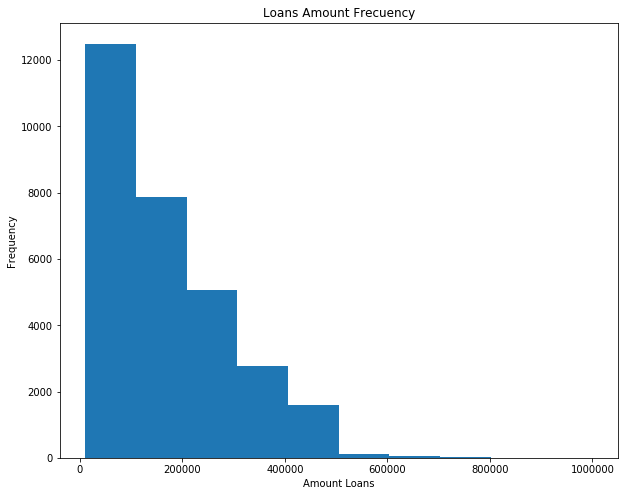

In [136]:
#Histograma para limite de prestamo
plt.hist(credit['LIMIT_BAL'])
plt.xlabel('Amount Loans')
plt.ylabel('Frequency')
plt.title('Loans Amount Frecuency')
plt.show()

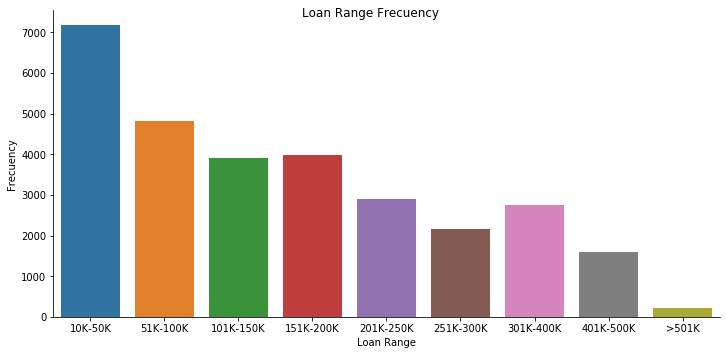

In [137]:
# Grafico de barras para rango de limite de prestamo
gbarLoanRange = sns.factorplot('LOAN_RANGE', data=credit, kind='count', aspect=2)
gbarLoanRange.fig.suptitle('Loan Range Frecuency')
gbarLoanRange.set_xlabels('Loan Range')
gbarLoanRange.set_ylabels('Frecuency')

In [138]:
# Agrupar y contabilizar por rango de prestamo
credit.groupby('LOAN_RANGE')['LOAN_RANGE'].count()

LOAN_RANGE
10K-50K      7183
51K-100K     4822
101K-150K    3902
151K-200K    3978
201K-250K    2905
251K-300K    2154
301K-400K    2759
401K-500K    1598
>501K         206
Name: LOAN_RANGE, dtype: int64

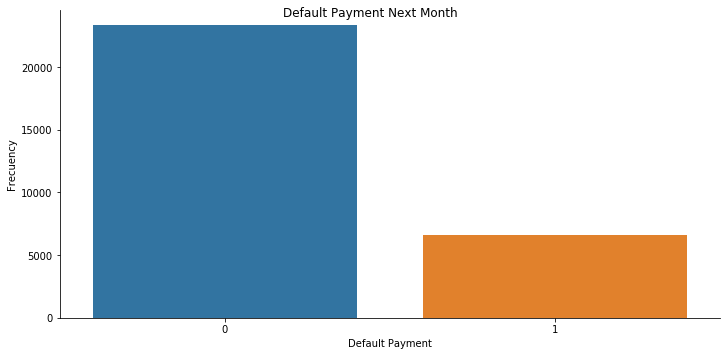

In [139]:
# Grafico de barras para incumplimiento de pago para el proximo periodo
gbarLoanRange = sns.factorplot('DefaultPaymentNextMonth', data=credit, kind='count', aspect=2)
gbarLoanRange.fig.suptitle('Default Payment Next Month')
gbarLoanRange.set_xlabels('Default Payment')
gbarLoanRange.set_ylabels('Frecuency')

In [140]:
# Agrupar y contabilizar por incumplimiento de pago
credit.groupby('DefaultPaymentNextMonth')['DefaultPaymentNextMonth'].count()

DefaultPaymentNextMonth
0    23364
1     6636
Name: DefaultPaymentNextMonth, dtype: int64

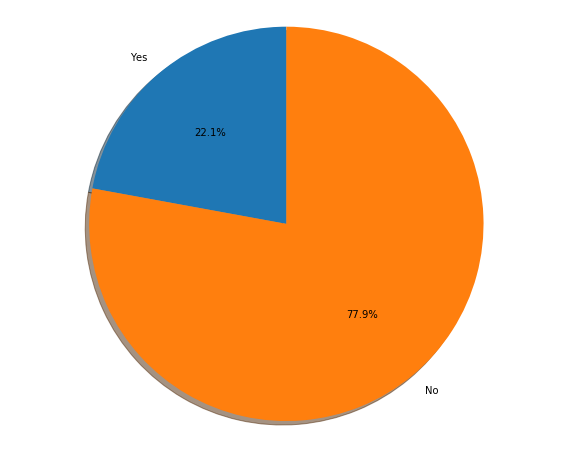

In [141]:
# Grafico de proporciones para incumplimiento de pago
labels = 'Yes', 'No'
sizes = [6636,23364]
fig1, DefaultPaymentProp = plt.subplots()
DefaultPaymentProp.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
DefaultPaymentProp.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 0.98, 'Education Level')

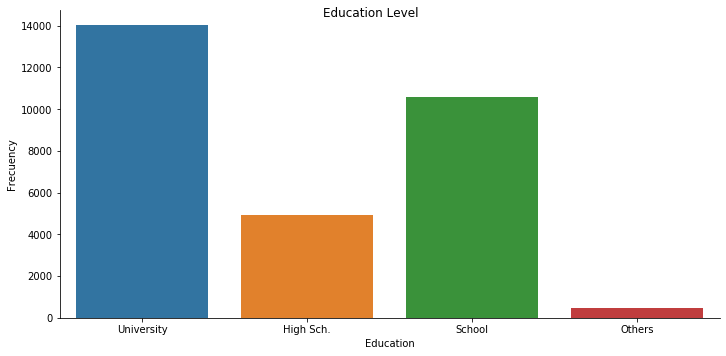

In [142]:
# Grafico de barras para nivel academico
gbarStudy= sns.factorplot('STUDY', data=credit, kind='count', aspect=2,order=['University','High Sch.','School','Others'])
gbarStudy.set_xlabels('Education')
gbarStudy.set_ylabels('Frecuency')
gbarStudy.fig.suptitle('Education Level')

In [143]:
# Agrupar y contabilizar por nivel academico
credit.groupby('STUDY')['STUDY'].count()

STUDY
High Sch.      4917
Others          468
School        10585
University    14030
Name: STUDY, dtype: int64

In [144]:
# Calcular proporcion de incumplimiento de pago por nivel academico
propNivelAcademico=credit.groupby("STUDY")['DefaultPaymentNextMonth'].value_counts(normalize=True).unstack()
propNivelAcademico

DefaultPaymentNextMonth,0,1
STUDY,,
High Sch.,0.748424,0.251576
Others,0.929487,0.070513
School,0.807652,0.192348
University,0.762651,0.237349


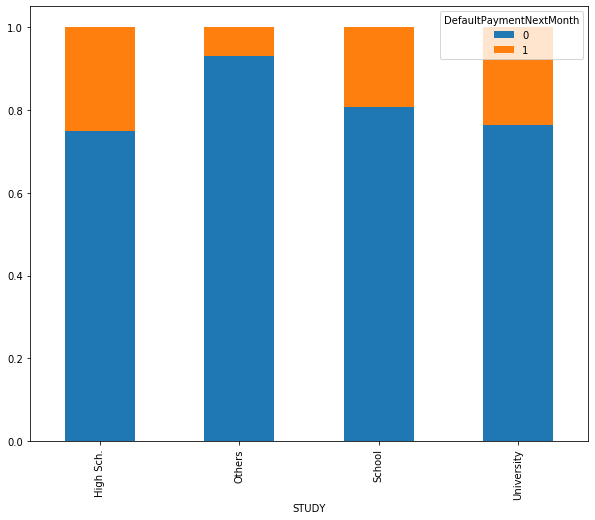

In [145]:
# Grafico proporcion de incumplimiento de pago por nivel academico
propStudies = credit.groupby("STUDY")['DefaultPaymentNextMonth'].value_counts(normalize=True).unstack()
propStudies.plot(kind='bar', stacked='True')

Text(0.5, 0.98, 'Clients per Gender')

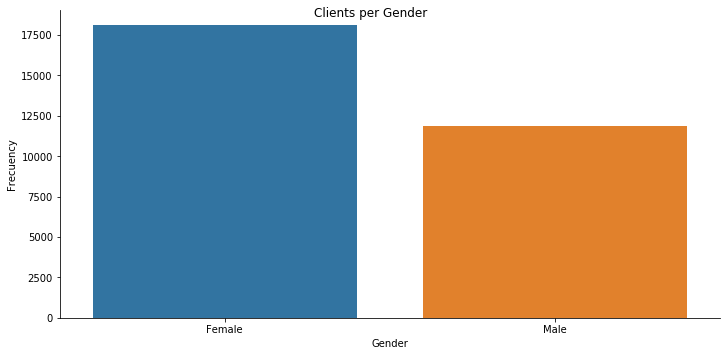

In [146]:
# Grafico por genero
gbarSex = sns.factorplot('GENDER', data=credit, kind='count', aspect=2)
gbarSex.set_xlabels('Gender')
gbarSex.set_ylabels('Frecuency')
gbarSex.fig.suptitle('Clients per Gender')

In [147]:
# Calcular proporcion de incumplimiento de pago por genero
propSex=credit.groupby("GENDER")['DefaultPaymentNextMonth'].value_counts(normalize=True).unstack()
propSex

DefaultPaymentNextMonth,0,1
GENDER,,
Female,0.792237,0.207763
Male,0.758328,0.241672


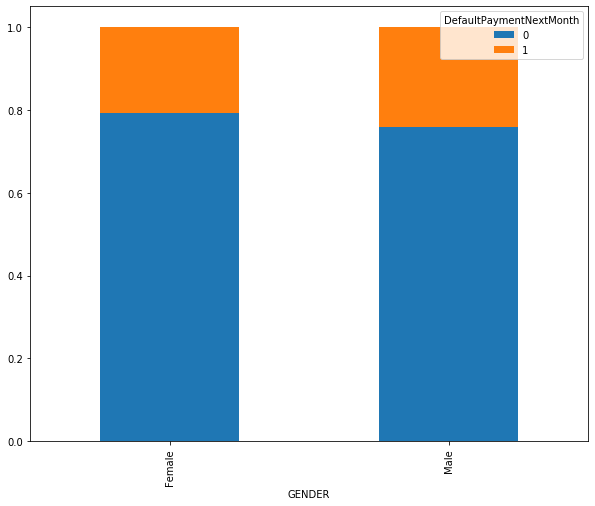

In [148]:
propSex.plot(kind='bar', stacked='True')

Text(0.5, 0.98, 'Clients per Marital Status')

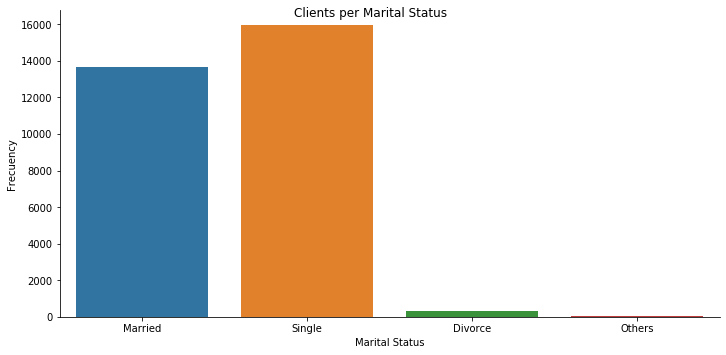

In [149]:
# Grafico de barras para status matrimonial
gbarSM = sns.factorplot('MARITAL_ST', data=credit, kind='count', aspect=2, order=['Married','Single','Divorce','Others'])
gbarSM.set_xlabels('Marital Status')
gbarSM.set_ylabels('Frecuency')
gbarSM.fig.suptitle('Clients per Marital Status')

In [150]:
# Calcular proporcion de incumplimiento de pago por estatus civil
propSM=credit.groupby("MARITAL_ST")['DefaultPaymentNextMonth'].value_counts(normalize=True).unstack()
propSM

DefaultPaymentNextMonth,0,1
MARITAL_ST,,
Divorce,0.739938,0.260062
Married,0.765283,0.234717
Others,0.907407,0.092593
Single,0.790717,0.209283


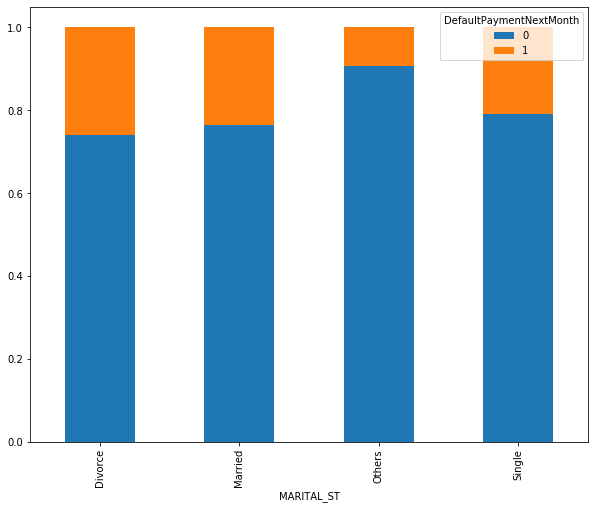

In [151]:
propSM.plot(kind='bar', stacked='True')

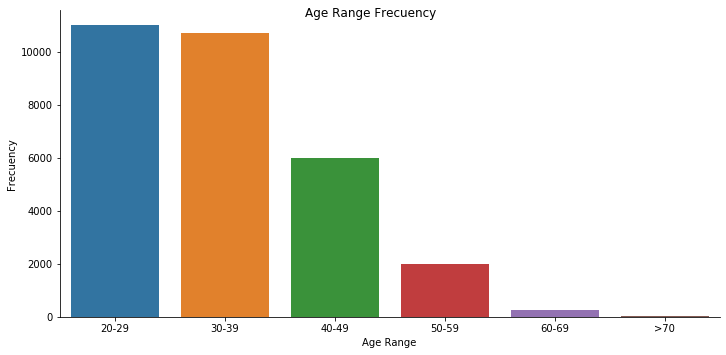

In [152]:
# Grafico de barras para rango de edad
gbarAgeRange = sns.factorplot('AGE_RANGE', data=credit, kind='count', aspect=2)
gbarAgeRange.fig.suptitle('Age Range Frecuency')
gbarAgeRange.set_xlabels('Age Range')
gbarAgeRange.set_ylabels('Frecuency')

In [153]:
# Agrupar por rango de edad
credit.groupby('AGE_RANGE')['AGE_RANGE'].count()


AGE_RANGE
20-29    11013
30-39    10713
40-49     6005
50-59     1997
60-69      257
>70         15
Name: AGE_RANGE, dtype: int64

In [154]:
# Calcular proporcion de incumplimiento de pago por rango de edad
propAge=credit.groupby("AGE_RANGE")['DefaultPaymentNextMonth'].value_counts(normalize=True).unstack()
propAge

DefaultPaymentNextMonth,0,1
AGE_RANGE,,
20-29,0.775629,0.224371
30-39,0.795669,0.204331
40-49,0.767027,0.232973
50-59,0.747621,0.252379
60-69,0.735409,0.264591
>70,0.666667,0.333333


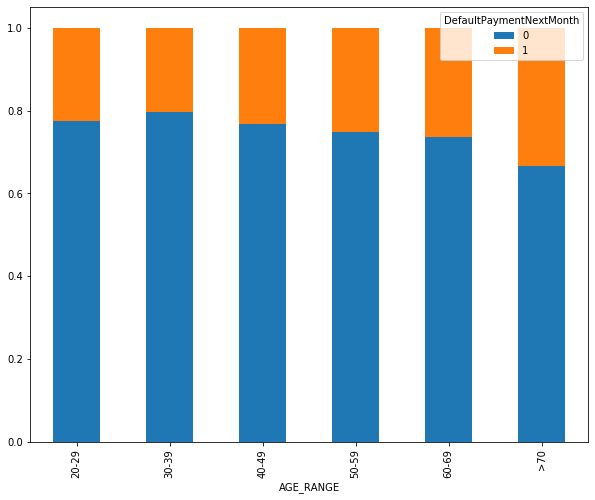

In [155]:
propAge.plot(kind='bar', stacked='True')

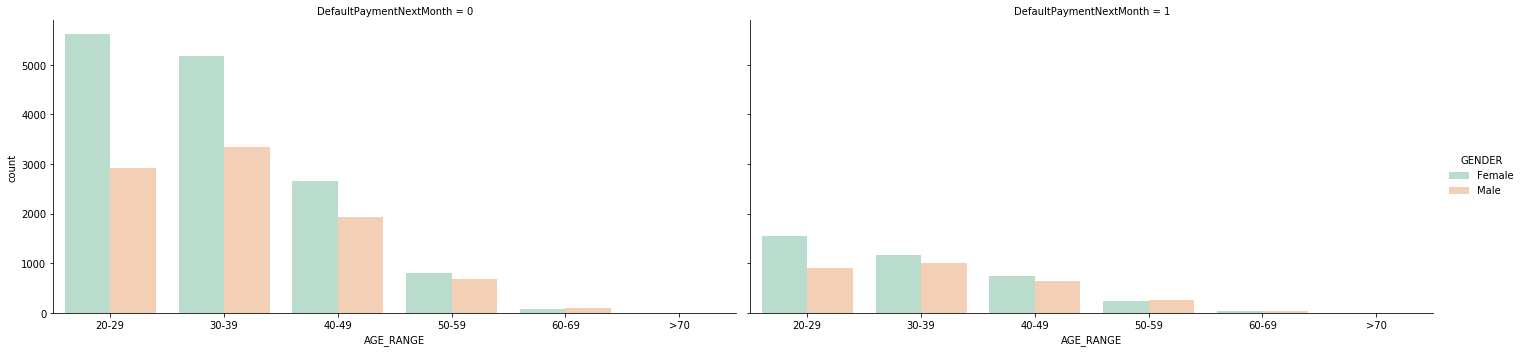

In [156]:
#Visulizar combinaciones de variables Edad y Genero
sns.factorplot('AGE_RANGE', data=credit, kind='count', palette='Pastel2', hue='GENDER', col='DefaultPaymentNextMonth', 
               aspect=2, size=5)

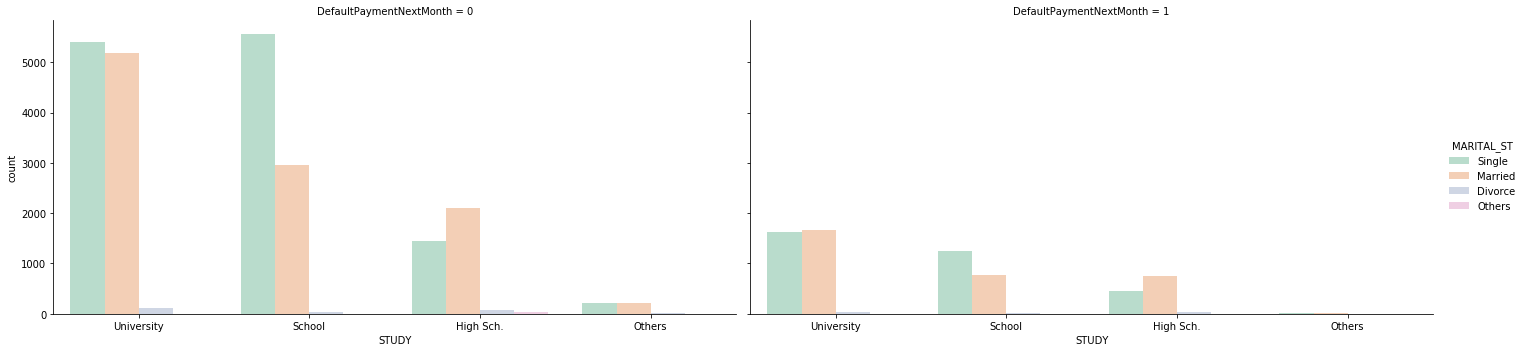

In [157]:
#Visualizar combinaciones de variables Estudio y Estado Civil
sns.factorplot('STUDY', data=credit, kind='count', palette='Pastel2', hue='MARITAL_ST', col='DefaultPaymentNextMonth', hue_order=['Single','Married','Divorce','Others'], 
               order=['University','School','High Sch.','Others'],aspect=2, size=5)

# Select the features

In [188]:
#Visualizar columnas
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PaySet05',
       'PayAgo05', 'PayJul05', 'PayJun05', 'PayMay05', 'PayApr05', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DefaultPaymentNextMonth', 'STUDY', 'GENDER', 'MARITAL_ST', 'AGE_RANGE',
       'LOAN_RANGE', 'DefaulPaymentNextMonth'],
      dtype='object')

In [278]:
#Selecciona todas las variables disponibles
AllFeatures=credit.loc[ : , ['LIMIT_BAL','AGE','SEX', 'EDUCATION', 'MARRIAGE', 'PaySet05',
       'PayAgo05', 'PayJul05', 'PayJun05', 'PayMay05', 'PayApr05', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
AllFeatures.head()

,LIMIT_BAL,AGE,SEX,EDUCATION,MARRIAGE,PaySet05,PayAgo05,PayJul05,PayJun05,PayMay05,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,1,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,26,2,2,2,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,2,2,2,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,2,2,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,1,2,1,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Define dependent variable

In [207]:
depVar = credit['DefaulPaymentNextMonth']
depVar

0        Yes
1        Yes
2         No
3         No
4         No
        ... 
29995     No
29996     No
29997    Yes
29998    Yes
29999    Yes
Name: DefaulPaymentNextMonth, Length: 30000, dtype: category
Categories (2, object): [No, Yes]

# Experiment 1

Se toman unicamente aquellas variables/atributos conocidos que se pueden tener en el momento que una persona solicita un credito. Edad, genero, estatus matrimonial y limite de credito son variables que se pueden tener desde un inicio y permitiran predecir si el cliente pagará su prestamo antes de ser autorizado. Para este experimento, se evalua el desempeño del modelo mediante la aplicación de diferentes algoritmos tales como Decision Tree, Super Vector Machine, Knn y Random Forest.

## Features Selection-Experiment 1

In [273]:
#Selecciona limite de credito, sexo, educacion, estado civil y edad
FilteredFeatures=credit.loc[ : , ['LIMIT_BAL','AGE','SEX', 'MARRIAGE', 'EDUCATION']]
FilteredFeatures.head()

,LIMIT_BAL,AGE,SEX,MARRIAGE,EDUCATION
0,20000,24,2,1,2
1,120000,26,2,2,2
2,90000,34,2,2,2
3,50000,37,2,1,2
4,50000,57,1,1,2


## Training and testing datasets-Experiment 1

In [209]:
#Variables independientes Training Set
XTrain = (FilteredFeatures[:])
XTrain.head()

,LIMIT_BAL,AGE,SEX,MARRIAGE,EDUCATION
0,20000,24,2,1,2
1,120000,26,2,2,2
2,90000,34,2,2,2
3,50000,37,2,1,2
4,50000,57,1,1,2


In [210]:
#Variable Dependiente Training Set
YTrain = depVar[:]
YTrainCount = len(YTrain.index)
print('The number of observations in the Y training set are:',str(YTrainCount))
YTrain.head()

The number of observations in the Y training set are: 30000


0    Yes
1    Yes
2     No
3     No
4     No
Name: DefaulPaymentNextMonth, dtype: category
Categories (2, object): [No, Yes]

In [211]:
#Variables Independientes Testing Set
XTest = FilteredFeatures[-100:]
XTestCount = len(XTest.index)
print('The number of observations in the feature testing set is:',str(XTestCount))
print(XTest.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  AGE  SEX  MARRIAGE  EDUCATION
29900      20000   29    1         2          2
29901      50000   29    1         2          2
29902     170000   30    1         2          3
29903     260000   30    1         1          1
29904      60000   30    1         2          3


In [212]:
# Variable Dependiente Testing Set.Y Truth
YTest = depVar[-100:]
YTestCount = len(YTest.index)
print('The number of observations in the Y training set are:',str(YTestCount))
YTest.head()

The number of observations in the Y training set are: 100


29900    Yes
29901     No
29902     No
29903     No
29904    Yes
Name: DefaulPaymentNextMonth, dtype: category
Categories (2, object): [No, Yes]

In [300]:
#Cross Validation
XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.3)

In [214]:
XTrain.shape, XTest.shape

((21000, 5), (9000, 5))

## Predictive Models -Experiment 1

## Decision Tree

In [ ]:
# Decision Tree
modelDecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [218]:
#Training
modelDecisionTree.fit(XTrain,YTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [219]:
#Cross Validation
print(cross_val_score(modelDecisionTree, XTrain, YTrain, cv=10, n_jobs=2)) 
modelDecisionTree.score(XTrain,YTrain)

[0.76904762 0.77619048 0.77238095 0.77       0.7752381  0.7752381
 0.76095238 0.77238095 0.76428571 0.7747619 ]


0.7895238095238095

In [224]:
#Testing
predictionDecisionTree= modelDecisionTree.predict(XTest)

In [225]:
#Confusion Matrix
confusion_matrix(YTest,predictionDecisionTree, labels=['No', 'Yes'])
pd.crosstab(YTest,predictionDecisionTree, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6857,147,7004
Yes,1948,48,1996
All,8805,195,9000


In [230]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionDecisionTree,target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      0.98      0.87      7004
         Yes       0.25      0.02      0.04      1996

    accuracy                           0.77      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.66      0.77      0.68      9000



## Super Vector Machine

In [233]:
#SVM
modelSVM=svm.SVC(C=1, kernel='rbf')

In [234]:
#Training
modelSVM.fit(XTrain,YTrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [247]:
#Cross Validation
print(cross_val_score(modelSVM, XTrain, YTrain, cv=10, n_jobs=2)) 
modelSVM.score(XTrain,YTrain)

[0.77904762 0.77904762 0.77904762 0.77904762 0.77904762 0.77904762
 0.77904762 0.77904762 0.77904762 0.77904762]


0.7790476190476191

In [248]:
#Testing
predictionSVM= modelSVM.predict(XTest)

In [249]:
#Confusion Matrix
confusion_matrix(YTest,predictionSVM, labels=['No', 'Yes'])
pd.crosstab(YTest,predictionSVM, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,All
True,,
No,7004,7004
Yes,1996,1996
All,9000,9000


In [250]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionSVM,target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      1.00      0.88      7004
         Yes       0.00      0.00      0.00      1996

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



C:\Users\FQ634EK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [253]:
#KNN
modelKnn = KNeighborsClassifier(n_jobs=2, n_neighbors=13, weights='uniform', p=1)

In [254]:
#Training
modelKnn.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=13, p=1,
                     weights='uniform')

In [255]:
#Cross Validation
print(cross_val_score(modelKnn, XTrain, YTrain, cv=10, n_jobs=2)) 
modelKnn.score(XTrain,YTrain)

[0.76761905 0.76952381 0.77428571 0.76619048 0.77428571 0.76952381
 0.77095238 0.76285714 0.76904762 0.7747619 ]


0.7848571428571428

In [256]:
#Testing
predictionKnn= modelKnn.predict(XTest)

In [257]:
#Confusion Matrix
confusion_matrix(YTest,predictionKnn, labels=['No', 'Yes'])
pd.crosstab(YTest,predictionKnn, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6778,226,7004
Yes,1906,90,1996
All,8684,316,9000


In [258]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionKnn,target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      0.97      0.86      7004
         Yes       0.28      0.05      0.08      1996

    accuracy                           0.76      9000
   macro avg       0.53      0.51      0.47      9000
weighted avg       0.67      0.76      0.69      9000



# Random Forest

In [259]:
#RF
modelRF= RandomForestClassifier(max_depth=7, n_estimators=70, n_jobs=2, criterion='gini')

In [260]:
#Training
modelRF.fit(XTrain,YTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [261]:
#Cross Validation
print(cross_val_score(modelRF, XTrain, YTrain, cv=10, n_jobs=2)) 
modelRF.score(XTrain,YTrain)

[0.77904762 0.77904762 0.77904762 0.77809524 0.77904762 0.77904762
 0.77952381 0.77904762 0.77904762 0.77904762]


0.779952380952381

In [263]:
#Testing
predictionRf= modelRF.predict(XTest)

In [265]:
#Confusion Matrix
confusion_matrix(YTest,predictionRf, labels=['No', 'Yes'])
pd.crosstab(YTest,predictionRf, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6996,8,7004
Yes,1994,2,1996
All,8990,10,9000


In [266]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest, predictionRf,target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      1.00      0.87      7004
         Yes       0.20      0.00      0.00      1996

    accuracy                           0.78      9000
   macro avg       0.49      0.50      0.44      9000
weighted avg       0.65      0.78      0.68      9000



# Experiment 2

Se toman unicamente aquellas variables/atributos que sugiere la función RFE (Recursive Feature Elimination). Para este experimento, se evalua el desempeño del modelo mediante la aplicación de diferentes algoritmos tales como Decision Tree, Super Vector Machine, Knn y Random Forest.

## Features Selection RFE-Experiment 2

In [291]:
rfeRF=RandomForestClassifier()
rfe = RFE(rfeRF, n_features_to_select=10)
rfe.fit(AllFeatures,depVar)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True False False False False False  True
  True  True  True  True  True  True False False False False False]
[ 1  1 14 11 13  1  4  8  9 10 12  1  1  1  1  1  1  1  2  3  7  6  5]


Las 10 variables independientes con un efecto más significativo sobre la variable a predecir segun RFE son: 'LIMIT_BAL','AGE','PaySet05', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1'.

In [290]:
# Variables con RFE
featuresRFE = credit.loc[ : , ['LIMIT_BAL', 'AGE', 'PaySet05','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1']]
featuresRFE.head()

,LIMIT_BAL,AGE,PaySet05,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1
0,20000,24,2,3913,3102,689,0,0,0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,0
2,90000,34,0,29239,14027,13559,14331,14948,15549,1518
3,50000,37,0,46990,48233,49291,28314,28959,29547,2000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,2000


## Training and testing datasets-Experiment 2

In [292]:
#Variables independientes Training Set
XTrain1 = (featuresRFE[:])
XTrain1.head()

,LIMIT_BAL,AGE,PaySet05,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1
0,20000,24,2,3913,3102,689,0,0,0,0
1,120000,26,-1,2682,1725,2682,3272,3455,3261,0
2,90000,34,0,29239,14027,13559,14331,14948,15549,1518
3,50000,37,0,46990,48233,49291,28314,28959,29547,2000
4,50000,57,-1,8617,5670,35835,20940,19146,19131,2000


In [294]:
#Variable Dependiente Training Set
YTrain1 = depVar[:]
YTrain1Count = len(YTrain.index)
print('The number of observations in the Y training set are:',str(YTrain1Count))
YTrain1.head()

The number of observations in the Y training set are: 21000


0    Yes
1    Yes
2     No
3     No
4     No
Name: DefaulPaymentNextMonth, dtype: category
Categories (2, object): [No, Yes]

In [295]:
#Variables Independientes Testing Set
XTest1 = featuresRFE[-100:]
XTest1Count = len(XTest1.index)
print('The number of observations in the feature testing set is:',str(XTest1Count))
print(XTest1.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  AGE PaySet05  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
29900      20000   29        0      16809          0          0          0   
29901      50000   29        1      50845      48750     103486      50590   
29902     170000   30        0      10392     168088     168955     161351   
29903     260000   30       -1      27378      17082      13333         99   
29904      60000   30        0      54952      56021      54126      58732   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  
29900          0          0         0  
29901      50248      49387         0  
29902     126198     124746    168096  
29903         99     172104     10018  
29904      59306      59728      2600  


In [297]:
# Variable Dependiente Testing Set.Y Truth
YTest1 = depVar[-100:]
YTest1Count = len(YTest1.index)
print('The number of observations in the Y training set are:',str(YTest1Count))
YTest1.head()

The number of observations in the Y training set are: 100


29900    Yes
29901     No
29902     No
29903     No
29904    Yes
Name: DefaulPaymentNextMonth, dtype: category
Categories (2, object): [No, Yes]

In [298]:
#Cross Validation
XTrain1, XTest1, YTrain1, YTest1 = train_test_split(XTrain1, YTrain1, test_size=0.3)

In [299]:
XTrain.shape, XTest.shape

((21000, 5), (9000, 5))

## Predictive Models -Experiment 2


## Decision Tree

In [301]:
# Decision Tree
modelDecisionTree1 = DecisionTreeClassifier(criterion='gini', max_depth=10)

In [302]:
#Training
modelDecisionTree1.fit(XTrain1,YTrain1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [304]:
#Cross Validation
print(cross_val_score(modelDecisionTree1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelDecisionTree1.score(XTrain1,YTrain1)

[0.81047619 0.80095238 0.80333333 0.81428571 0.78904762 0.80285714
 0.80285714 0.8047619  0.79952381 0.80904762]


0.8392857142857143

In [305]:
#Testing
predictionDecisionTree1= modelDecisionTree1.predict(XTest1)

In [306]:
#Confusion Matrix
confusion_matrix(YTest1,predictionDecisionTree1, labels=['No', 'Yes'])
pd.crosstab(YTest1,predictionDecisionTree1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6634,417,7051
Yes,1233,716,1949
All,7867,1133,9000


In [308]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionDecisionTree1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.84      0.94      0.89      7051
         Yes       0.63      0.37      0.46      1949

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



## Super Vector Machine

In [309]:
#SVM
modelSVM1=svm.SVC(C=1, kernel='rbf')

In [310]:
#Training
modelSVM1.fit(XTrain1,YTrain1)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [312]:
#Cross Validation
print(cross_val_score(modelSVM1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelSVM1.score(XTrain1,YTrain1)

[0.77714286 0.77714286 0.77714286 0.77666667 0.77666667 0.77666667
 0.77666667 0.77666667 0.77666667 0.77666667]


0.7768571428571428

In [313]:
#Testing
predictionSVM1= modelSVM1.predict(XTest1)

In [314]:
#Confusion Matrix
confusion_matrix(YTest1,predictionSVM1, labels=['No', 'Yes'])
pd.crosstab(YTest1,predictionSVM1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,All
True,,
No,7051,7051
Yes,1949,1949
All,9000,9000


In [315]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionSVM1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      1.00      0.88      7051
         Yes       0.00      0.00      0.00      1949

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\FQ634EK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [316]:
#KNN
modelKnn1 = KNeighborsClassifier(n_jobs=2, n_neighbors=13, weights='uniform', p=1)

In [317]:
#Training
modelKnn.fit(XTrain1,YTrain1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=13, p=1,
                     weights='uniform')

In [318]:
#Cross Validation
print(cross_val_score(modelKnn1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelKnn.score(XTrain1,YTrain1)

[0.75904762 0.76619048 0.76857143 0.76761905 0.76380952 0.77095238
 0.76714286 0.7652381  0.76142857 0.75952381]


0.7899047619047619

In [319]:
#Testing
predictionKnn1= modelKnn.predict(XTest1)

In [320]:
#Confusion Matrix
confusion_matrix(YTest1,predictionKnn1, labels=['No', 'Yes'])
pd.crosstab(YTest1,predictionKnn1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6730,321,7051
Yes,1699,250,1949
All,8429,571,9000


In [321]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionKnn1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.80      0.95      0.87      7051
         Yes       0.44      0.13      0.20      1949

    accuracy                           0.78      9000
   macro avg       0.62      0.54      0.53      9000
weighted avg       0.72      0.78      0.72      9000



## Random Forest

In [322]:
#RF
modelRF1= RandomForestClassifier(max_depth=7, n_estimators=70, n_jobs=2, criterion='gini')

In [323]:
#Training
modelRF.fit(XTrain1,YTrain1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [324]:
#Cross Validation
print(cross_val_score(modelRF1, XTrain1, YTrain1, cv=10, n_jobs=2)) 
modelRF.score(XTrain1,YTrain1)

[0.81761905 0.82380952 0.81952381 0.83047619 0.81238095 0.81571429
 0.8152381  0.82095238 0.8147619  0.81380952]


0.8256190476190476

In [325]:
#Testing
predictionRf1= modelRF.predict(XTest1)

In [326]:
#Confusion Matrix
confusion_matrix(YTest1,predictionRf1, labels=['No', 'Yes'])
pd.crosstab(YTest1,predictionRf1, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,No,Yes,All
True,,,
No,6738,313,7051
Yes,1257,692,1949
All,7995,1005,9000


In [328]:
#Classification Report
target_names = ['No', 'Yes']
print(classification_report(YTest1, predictionRf1,target_names=target_names))

              precision    recall  f1-score   support

          No       0.84      0.96      0.90      7051
         Yes       0.69      0.36      0.47      1949

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000

